<a href="https://colab.research.google.com/github/till2/me/blob/main/RL%20Bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stationary epsilon vs. Upper Confidence Bound Learning (UCS)

## Training a simple Reinforcement Learning Agent to evaluate actions

In [ ]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### epsilon- greedy learning
$\epsilon = 0.1$ 

In [ ]:
Actions = [i for i in range(5)]

TrueValues = [0.2, -1, 0, 1.8, 0.8]
Q = np.zeros((n_actions))
N = np.zeros((n_actions)).astype(int)

In [ ]:
# Hyperparameters

n_actions = 5
training_iter = 20000

QList = [[] for _ in range(n_actions)]

TrueValuesList = [[] for _ in range(n_actions)]
for i in range(n_actions):
    TrueValuesList[i].append(TrueValues[i])

ErrorList = [[] for _ in range(n_actions)]

RewardList = []

eps = 0.1

In [ ]:
# Bandit Rewards
# selected from normal distribution with (E(X), std.dev.)

def bandit(a):
    if a == 0:
        return np.random.normal(0.2, 2)
    elif a == 1:
        return np.random.normal(-1, 1)
    elif a == 2:
        return np.random.normal(0, 4)
    elif a == 3:
        return np.random.normal(1.8, 1.5)
    elif a == 4:
        return np.random.normal(0.8, 3)

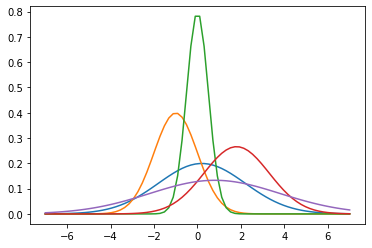

In [ ]:
# Reward Distribution

x = np.linspace(-7,7,70)
plt.plot(x, norm.pdf(x, 0.2, 2))
plt.plot(x, norm.pdf(x, -1, 1))
plt.plot(x, norm.pdf(x, 0, 0.5))
plt.plot(x, norm.pdf(x, 1.8, 1.5))
plt.plot(x, norm.pdf(x, 0.8, 3))

In [ ]:
print(f"{Actions = :}")
print(f"{Q = :}")
print(f"{N = :}")

SyntaxError: ignored

In [ ]:
# Training

for i in range(training_iter):
    
    # determine whether to exploit or not
    is_greedy = np.random.choice(a = [True,False], size = 1, replace = False, p = [1-eps, eps])[0]
    
    if is_greedy:
        A = np.argmax(Q)
    else:
        A = np.random.choice(a = Actions, size = 1, replace = False, p = [(1/len(Actions)) for _ in range(len(Actions))])[0]

    R = bandit(A)
    RewardList.append(R)
    N[A] += 1
    
    Q[A] = Q[A] + (1/N[A])*(R - Q[A])
    
    for i in range(n_actions):
        QList[i].append(Q[i])
        ErrorList[i].append(abs(TrueValues[i]-Q[i]))

In [ ]:
Error = [(TrueValues[i] - Q[i]) for i in range(len(Actions))]

In [ ]:
# print(f"{TrueValues = :}")
# print(f"{         Q = :}")
# print(f"{     Error = :}")

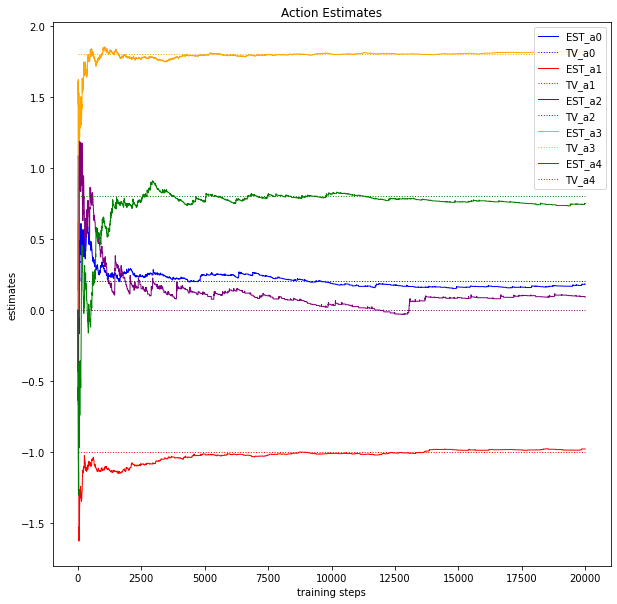

In [ ]:
# Plot Estimates Progress

plt.figure(figsize=(10,10))

# action 0
plt.plot(QList[0], label = 'EST_a0', color='blue', linewidth = 1)
TV_a0_x = [0, training_iter]
TV_a0_y = [TrueValues[0], TrueValues[0]]
plt.plot(TV_a0_x, TV_a0_y, color='blue', linewidth = 1, label = 'TV_a0',linestyle='dotted')

# action 1
plt.plot(QList[1], label = 'EST_a1', color='red', linewidth = 1)
TV_a1_x = [0, training_iter]
TV_a1_y = [TrueValues[1], TrueValues[1]]
plt.plot(TV_a1_x, TV_a1_y, color='red', linewidth = 1, label = 'TV_a1',linestyle='dotted')

# action 2
plt.plot(QList[2], label = 'EST_a2', color='purple', linewidth = 1)
TV_a2_x = [0, training_iter]
TV_a2_y = [TrueValues[2], TrueValues[2]]
plt.plot(TV_a2_x, TV_a2_y, color='purple', linewidth = 1, label = 'TV_a2',linestyle='dotted')

# action 3
plt.plot(QList[3], label = 'EST_a3', color='orange', linewidth = 1)
TV_a3_x = [0, training_iter]
TV_a3_y = [TrueValues[3], TrueValues[3]]
plt.plot(TV_a3_x, TV_a3_y, color='orange', linewidth = 1, label = 'TV_a3',linestyle='dotted')

# action 4
plt.plot(QList[4], label = 'EST_a4', color='green', linewidth = 1)
TV_a4_x = [0, training_iter]
TV_a4_y = [TrueValues[4], TrueValues[4]]
plt.plot(TV_a4_x, TV_a4_y, color='green', linewidth = 1, label = 'TV_a4',linestyle='dotted')

plt.title("Action Estimates")
plt.xlabel('training steps')
plt.ylabel('estimates')
plt.legend(loc="upper right")

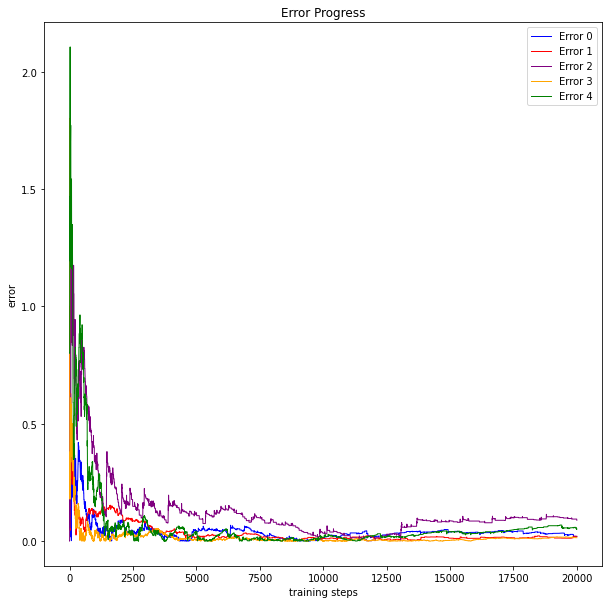

In [ ]:
# Error Progress

plt.figure(figsize=(10,10))

# action 0
plt.plot(ErrorList[0], label = 'Error 0', color='blue', linewidth = 1)

# action 1
plt.plot(ErrorList[1], label = 'Error 1', color='red', linewidth = 1)

# action 2
plt.plot(ErrorList[2], label = 'Error 2', color='purple', linewidth = 1)

# action 3
plt.plot(ErrorList[3], label = 'Error 3', color='orange', linewidth = 1)

# action 4
plt.plot(ErrorList[4], label = 'Error 4', color='green', linewidth = 1)

plt.title("Error Progress")
plt.xlabel('training steps')
plt.ylabel('error')
plt.legend(loc="upper right")

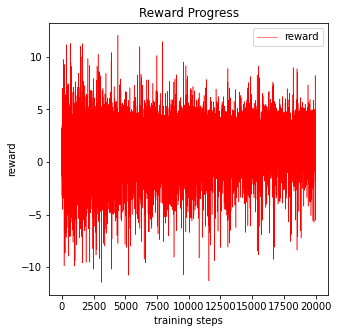

In [ ]:
# Reward Progress

plt.figure(figsize=(5,5))

plt.plot(RewardList, label = 'reward', color='red', linewidth = 0.5)

plt.title("Reward Progress")
plt.xlabel('training steps')
plt.ylabel('reward')
plt.legend(loc="upper right")


# Note: The reward will not converge to a limit because epsilon is fixed.

In [ ]:
for i in range(5):
    print(f"Action {i}: TrueValue %3.2f | Prediction %3.2f | Error %3.2f " %(TrueValues[i], Q[i], Error[i]))

Action 0: TrueValue 0.20 | Prediction 0.18 | Error 0.20 
Action 1: TrueValue -1.00 | Prediction -0.98 | Error -1.00 
Action 2: TrueValue 0.00 | Prediction 0.09 | Error 0.00 
Action 3: TrueValue 1.80 | Prediction 1.81 | Error 1.80 
Action 4: TrueValue 0.80 | Prediction 0.75 | Error 0.80 


In [ ]:
#                                                                                                                               #
# A better approach is to decrease epsilon over time to first explore and then and exploit higher valued actions in the long run. #
#                                                                                                                               #

In [ ]:
# Reset Parameters

n_actions = 5
training_iter = 10000000

QList = [[] for _ in range(n_actions)]

TrueValues = [0.2, -1, 0, 1.8, 0.8]
TrueValuesList = [[] for _ in range(n_actions)]
for i in range(n_actions):
    TrueValuesList[i].append(TrueValues[i])

ErrorList = [[] for _ in range(n_actions)]

RewardList = []
EpsilonList = []

timestep = 0
eps = 0.1

# level of exploration
c = 25

Actions = [i for i in range(5)]
UCB_Value = np.zeros((n_actions))

Q = np.zeros((n_actions))
N = np.ones((n_actions)).astype(int)

### Upper confidence bound learning with logarithmic reduction

$A_t = argmax_a [Q_t(a) + c * \sqrt{\frac{\ln{t}}{N_t(a)}}]$


In [ ]:
# Training with Upper Confidence Bound

for i in range(training_iter):
    
    timestep += 1
    # determine whether to exploit or not
#     is_greedy = np.random.choice(a = [True,False], size = 1, replace = False, p = [1-eps, eps])[0]
    
#     if is_greedy:
#         A = np.argmax(Q)
#     else:
#         A = np.random.choice(a = Actions, size = 1, replace = False, p = [(1/len(Actions)) for _ in range(len(Actions))])[0]
    
    for a in Actions:
        UCB_Value[a] = Q[a] + c*np.sqrt(np.log(timestep)/N[a])
        
    A = np.argmax(UCB_Value)
    
    R = bandit(A)
    RewardList.append(R)
    N[A] += 1
    
    Q[A] = Q[A] + (1/N[A])*(R - Q[A])
    
    for i in range(n_actions):
        QList[i].append(Q[i])
        ErrorList[i].append(abs(TrueValues[i]-Q[i]))

In [ ]:
# Plot Estimates Progress

plt.figure(figsize=(10,10))

# action 0
plt.plot(QList[0], label = 'EST_a0', color='blue', linewidth = 1)
TV_a0_x = [0, training_iter]
TV_a0_y = [TrueValues[0], TrueValues[0]]
plt.plot(TV_a0_x, TV_a0_y, color='blue', linewidth = 1, label = 'TV_a0',linestyle='dotted')

# action 1
plt.plot(QList[1], label = 'EST_a1', color='red', linewidth = 1)
TV_a1_x = [0, training_iter]
TV_a1_y = [TrueValues[1], TrueValues[1]]
plt.plot(TV_a1_x, TV_a1_y, color='red', linewidth = 1, label = 'TV_a1',linestyle='dotted')

# action 2
plt.plot(QList[2], label = 'EST_a2', color='purple', linewidth = 1)
TV_a2_x = [0, training_iter]
TV_a2_y = [TrueValues[2], TrueValues[2]]
plt.plot(TV_a2_x, TV_a2_y, color='purple', linewidth = 1, label = 'TV_a2',linestyle='dotted')

# action 3
plt.plot(QList[3], label = 'EST_a3', color='orange', linewidth = 1)
TV_a3_x = [0, training_iter]
TV_a3_y = [TrueValues[3], TrueValues[3]]
plt.plot(TV_a3_x, TV_a3_y, color='orange', linewidth = 1, label = 'TV_a3',linestyle='dotted')

# action 4
plt.plot(QList[4], label = 'EST_a4', color='green', linewidth = 1)
TV_a4_x = [0, training_iter]
TV_a4_y = [TrueValues[4], TrueValues[4]]
plt.plot(TV_a4_x, TV_a4_y, color='green', linewidth = 1, label = 'TV_a4',linestyle='dotted')

plt.title("Action Estimates")
plt.xlabel('training steps')
plt.ylabel('estimates')
plt.legend(loc="upper right")

In [ ]:
# Error Progress

plt.figure(figsize=(10,10))

# action 0
plt.plot(ErrorList[0], label = 'Error 0', color='blue', linewidth = 1)

# action 1
plt.plot(ErrorList[1], label = 'Error 1', color='red', linewidth = 1)

# action 2
plt.plot(ErrorList[2], label = 'Error 2', color='purple', linewidth = 1)

# action 3
plt.plot(ErrorList[3], label = 'Error 3', color='orange', linewidth = 1)

# action 4
plt.plot(ErrorList[4], label = 'Error 4', color='green', linewidth = 1)

plt.title("Error Progress")
plt.xlabel('training steps')
plt.ylabel('error')
plt.legend(loc="upper right")

In [ ]:
# Reward Progress with UCB (average reward increases)

plt.figure(figsize=(5,5))

plt.plot(RewardList, label = 'reward', color='red', linewidth = 0.5)

plt.title("Reward Progress")
plt.xlabel('training steps')
plt.ylabel('reward')
plt.legend(loc="upper right")

In [ ]:
# Use the trained RL Agent to pick a task (BATTLE)
A = np.argmax(Q)
# print(f"{A = :}")
print("reward: %.4f" %bandit(A))